In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


In [15]:
houses =  pd.read_csv('houses.csv')
houses.head()

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0


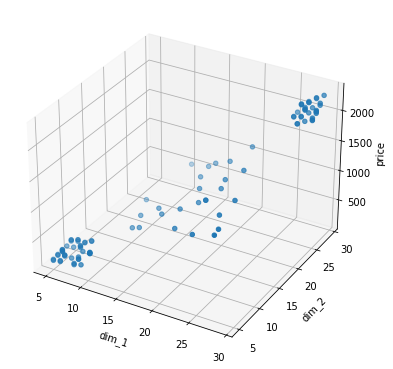

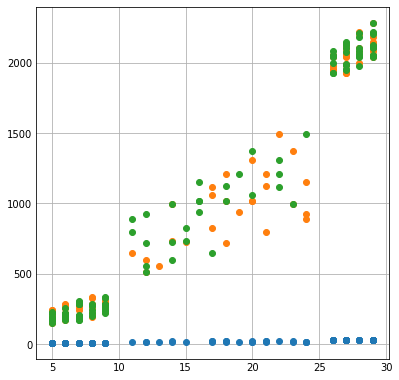

In [39]:
plt.style.use('_mpl-gallery')
xs = houses['dim_1']
ys = houses['dim_2']
zs = houses['price']

figure = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
ax.set_zlabel('price')

fig = plt.figure(figsize=(5,5))
axx = plt.axes()
axx.scatter(houses['dim_1'], houses['dim_2'], )
axx.scatter(houses['dim_1'], houses['price'])
axx.scatter(houses['dim_2'], houses['price'])

plt.show()

In [29]:
# price = f(dim_1) = a * dim_1 + b | a + b * dim_1 
X = houses[['dim_1']]
y = houses['price']
reg = LinearRegression().fit(X, y) 

In [25]:
print(f'{reg.intercept_} {reg.coef_}')

-351.6846978467231 [83.08870109]


In [26]:
a = reg.intercept_
[b] = reg.coef_

In [35]:
def reg_prediction(dim_1):
    return a + b*dim_1

In [32]:
reg_prediction(X.dim_1[0])

2057.887633711507

In [33]:
reg.predict(X[0:1])[0]

2057.887633711507

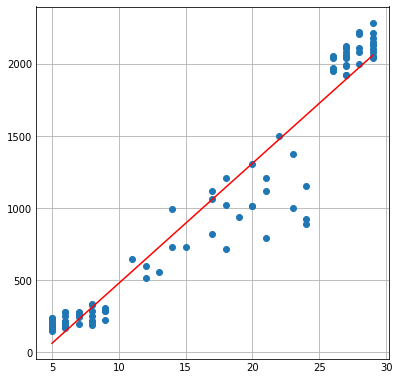

In [38]:
fig = plt.figure(figsize=(5,5))
axx = plt.axes()
axx.scatter(houses['dim_1'], houses['price'])
axx.plot([X.dim_1.min(), X.dim_1.max()], [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())], c='red')
plt.show()

### price = f(dim_1, dim_2) = a * dim_2 + b1 + b2 * dim_2 

In [41]:
X = houses[['dim_1', 'dim_2']]
y = houses['price']
reg = LinearRegression().fit(X, y) 
print(f'{reg.intercept_} {reg.coef_}')

a = reg.intercept_
[b1, b2] = reg.coef_

def reg_prediction_2(dim_1, dim_2):
    return a + b1*dim_1 + b2*dim_2

reg_prediction_2(X.dim_1[0], X.dim_2[0])

reg.predict(X[0:1])[0]

-415.4923663649213 [34.38095466 53.54529546]


2080.82359179565

In [45]:
d1, d2 = list(), list()
for x in np.linspace(min(houses['dim_1']), max(houses['dim_1']), 100):
    for y in np.linspace(min(houses['dim_1']), max(houses['dim_1']), 100):
        d1.append(x)
        d2.append(y)

d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

c:\Users\STEN CENTER ROSTOV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


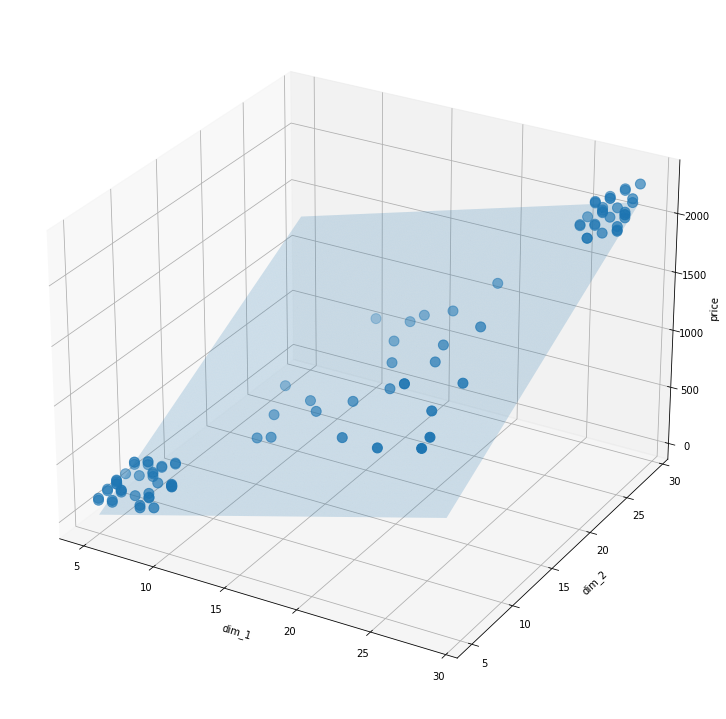

In [49]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

xs = houses['dim_1']
ys = houses['dim_2']
zs = houses['price']
ax.scatter(xs, ys, zs, s=100)

ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
ax.set_zlabel('price')

#changing the camera position
ax.elev = 27
plt.show()